# **Librerías**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Dataset**

In [2]:
df = pd.read_csv('../data/Numero_de_Veh_culos_El_ctricos_-_Hibridos_20250328.csv', sep=',')
df.head(5)

,COMBUSTIBLE,ESTADO,MODELO,FECHA_REGISTRO,AÑO_REGISTRO,CLASIFICACION,CLASE,SERVICIO,MARCA,LINEA,...,MODALIDAD,ORGANISMO_TRANSITO,MUNICIPIO,DEPARTAMENTO,CAPACIDAD_CARGA,CAPACIDAD_PASAJEROS,PESO,POTENCIA,EJES,CANTIDAD
0,ELECTRICO,ACTIVO,2022,06/30/2022 12:00:00 AM,2022,AUTOMOVIL,BUS,Público,BYD,BC11S01,...,PASAJEROS,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,NaN,49.0,20000.0,402.0,2.0,1
1,ELECTRICO,ACTIVO,2023,10/21/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,BYD,YUAN PRO EV,...,NaN,INSTITUTO DE MOVILIDAD DE PEREIRA,PEREIRA,Risaralda,NaN,NaN,1980.0,134.0,2.0,1
2,ELECTRICO,ACTIVO,2014,09/28/2015 12:00:00 AM,2015,MOTO,MOTOCICLETA,Particular,E-MOTORI,VITA,...,NaN,STRIA TTOyTTE MCPAL FLORENCIA,FLORENCIA,Caqueta,NaN,NaN,NaN,NaN,NaN,1
3,ELECTRICO,ACTIVO,2021,08/10/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Público,DONGFENG,DFA5030XXYABEV7,...,CARGA,STRIA TTOyTTE MCPAL FUNZA,FUNZA,Cundinamarca,845.0,NaN,2550.0,80.0,NaN,1
4,ELECTRICO,ACTIVO,2022,10/25/2021 12:00:00 AM,2021,AUTOMOVIL,CAMIONETA,Particular,BYD,SONG PRO EV,...,NaN,STRIA TTEyMOV CUND/EL ROSAL,EL ROSAL,Cundinamarca,NaN,NaN,2120.0,161.0,2.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          56545 non-null  object 
 1   ESTADO               56545 non-null  object 
 2   MODELO               56545 non-null  int64  
 3   FECHA_REGISTRO       56545 non-null  object 
 4   AÑO_REGISTRO         56545 non-null  int64  
 5   CLASIFICACION        56545 non-null  object 
 6   CLASE                56545 non-null  object 
 7   SERVICIO             56545 non-null  object 
 8   MARCA                56545 non-null  object 
 9   LINEA                56545 non-null  object 
 10  CARROCERIA           56545 non-null  object 
 11  CILINDRAJE           53054 non-null  float64
 12  MODALIDAD            36663 non-null  object 
 13  ORGANISMO_TRANSITO   56545 non-null  object 
 14  MUNICIPIO            56545 non-null  object 
 15  DEPARTAMENTO         56545 non-null 

## **Manejo de nulos,outliers, datos inconsistentes y elección de características**

### *Elección de características*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          56545 non-null  object 
 1   ESTADO               56545 non-null  object 
 2   MODELO               56545 non-null  int64  
 3   FECHA_REGISTRO       56545 non-null  object 
 4   AÑO_REGISTRO         56545 non-null  int64  
 5   CLASIFICACION        56545 non-null  object 
 6   CLASE                56545 non-null  object 
 7   SERVICIO             56545 non-null  object 
 8   MARCA                56545 non-null  object 
 9   LINEA                56545 non-null  object 
 10  CARROCERIA           56545 non-null  object 
 11  CILINDRAJE           53054 non-null  float64
 12  MODALIDAD            36663 non-null  object 
 13  ORGANISMO_TRANSITO   56545 non-null  object 
 14  MUNICIPIO            56545 non-null  object 
 15  DEPARTAMENTO         56545 non-null 

In [5]:
df['CLASIFICACION'].value_counts()

CLASIFICACION
AUTOMOVIL    54682
MOTO          1623
MOTOCARRO      240
Name: count, dtype: int64

In [6]:
df['CLASE'].value_counts()

CLASE
CAMIONETA       29565
AUTOMOVIL       17061
CAMPERO          4541
BUS              1962
MOTOCICLETA      1416
CUADRICICLO      1016
CAMION            530
MOTOCARRO         240
TRICIMOTO         188
MOTOTRICICLO       16
MICROBUS            6
CUATRIMOTO          3
TRACTOCAMION        1
Name: count, dtype: int64

In [7]:
df['ESTADO'].unique()

array(['ACTIVO', 'REGISTRADO'], dtype=object)

In [8]:
df['COMBUSTIBLE'].value_counts()

COMBUSTIBLE
GASO ELEC    45550
ELECTRICO     9574
DIES ELEC     1421
Name: count, dtype: int64

In [9]:
df['LINEA'].nunique()

589

In [10]:
df['CARROCERIA'].nunique()

42

In [11]:
df['CILINDRAJE'].nunique()

121

In [12]:
df['MODALIDAD'].value_counts()

MODALIDAD
PASAJEROS    35041
CARGA         1323
MIXTO          299
Name: count, dtype: int64

In [13]:
df['CANTIDAD'].value_counts()

CANTIDAD
1    56545
Name: count, dtype: int64

In [14]:
df['PESO'].nunique()

272

In [15]:
df['EJES'].value_counts()

EJES
2.0     53866
0.0       561
3.0        36
1.0         4
21.0        2
5.0         2
4.0         2
Name: count, dtype: int64

La columna 'EJES' tiene una posible incongruencia. Se debe eliminar las filas que tienen 0 ejes o realizar imputación de datos en su momento

In [16]:
df['POTENCIA'].nunique()

206

Dada la lista anterior de la información general del dataset, se eliminan las siguientes variables que no se alinean al objetivo de la investigación:
* CAPACIDAD_PASAJEROS: No se analiza cuantos pasajeros moviliza un vehículo, pues la investigación no se centra en si es un bus (que es por lo que está la columna en el dataset) o si es un vehículo de pasajeros. Y aún así, los datos no nulos son muy pocos. Si se intenta una imputación de datos, no se podría adivinar si un vehículo moviliza entre 1, 2 o 5 pasajeros (como se ve en el caso de distintos vehículos eléctricos e híbridos en el mercado)
* CAPACIDAD_CARGA:  Los datos nulos son demasiados. No se puede hacer imputación de datos porque la capacidad de carga en cada vehículo no sigue una tendencia marcada en el mercado y la falta de datos no permite ver patrones marcados.
* ESTADO: Los datos que contiene 'ESTADO' son 'REGISTRADO' y 'ACTIVO'. La intención es realizar un analisis de datos del mercado de vehículos eléctricos e híbridos en el país, por lo que sirven vehículos que estuvieron activos y también que están activos. Por lo tanto, se sabe que un vehículo 'ACTIVO' es 'REGISTRADO', y un vehículo 'REGISTRADO' alguna vez estuvo 'ACTIVO' o fue si quiera comprado para el territorio, por lo que esta columna es redundante para el objetivo de la investigación.
* ORGANISMO_TRANSITO: Esta columna es redundante dado que ya se tienen datos de ubicación como MUNICIPIO y DEPARTAMENTO
* CANTIDAD: Esta columna es redundante, ya que la cantidad en todas las filas es 1, que es la cantidad de vehículos registrados.
* CLASIFICACION: Esta es una columna con visión más general que la columna 'CLASE'. Se podría aprovechar mejor la columna 'CLASE' para modelos de predicción o clasificación posiblemente más precisos en un futuro.

In [17]:
df_filtered = df.drop(columns=['CAPACIDAD_PASAJEROS', 'CAPACIDAD_CARGA', 'ESTADO', 'ORGANISMO_TRANSITO', 'CANTIDAD', 'CLASIFICACION'])
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COMBUSTIBLE     56545 non-null  object 
 1   MODELO          56545 non-null  int64  
 2   FECHA_REGISTRO  56545 non-null  object 
 3   AÑO_REGISTRO    56545 non-null  int64  
 4   CLASE           56545 non-null  object 
 5   SERVICIO        56545 non-null  object 
 6   MARCA           56545 non-null  object 
 7   LINEA           56545 non-null  object 
 8   CARROCERIA      56545 non-null  object 
 9   CILINDRAJE      53054 non-null  float64
 10  MODALIDAD       36663 non-null  object 
 11  MUNICIPIO       56545 non-null  object 
 12  DEPARTAMENTO    56545 non-null  object 
 13  PESO            54116 non-null  float64
 14  POTENCIA        55548 non-null  float64
 15  EJES            54473 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 6.9+ MB


### *Manejo de datos nulos, outliers e inconsistencias*

In [18]:
df_filtered.isnull().sum()

COMBUSTIBLE           0
MODELO                0
FECHA_REGISTRO        0
AÑO_REGISTRO          0
CLASE                 0
SERVICIO              0
MARCA                 0
LINEA                 0
CARROCERIA            0
CILINDRAJE         3491
MODALIDAD         19882
MUNICIPIO             0
DEPARTAMENTO          0
PESO               2429
POTENCIA            997
EJES               2072
dtype: int64

Se realizará una imputación de datos sencillo teniendo en cuenta el tipo de datos y sus distribuciones.

In [19]:
moda_modalidad = df_filtered['MODALIDAD'].mode()[0]
df_filtered['MODALIDAD'] = df_filtered['MODALIDAD'].fillna(moda_modalidad)

In [20]:
df_filtered['MODALIDAD'].isnull().sum()

np.int64(0)

Al ser una variable cualitativa se realiza imputación de datos con la moda.

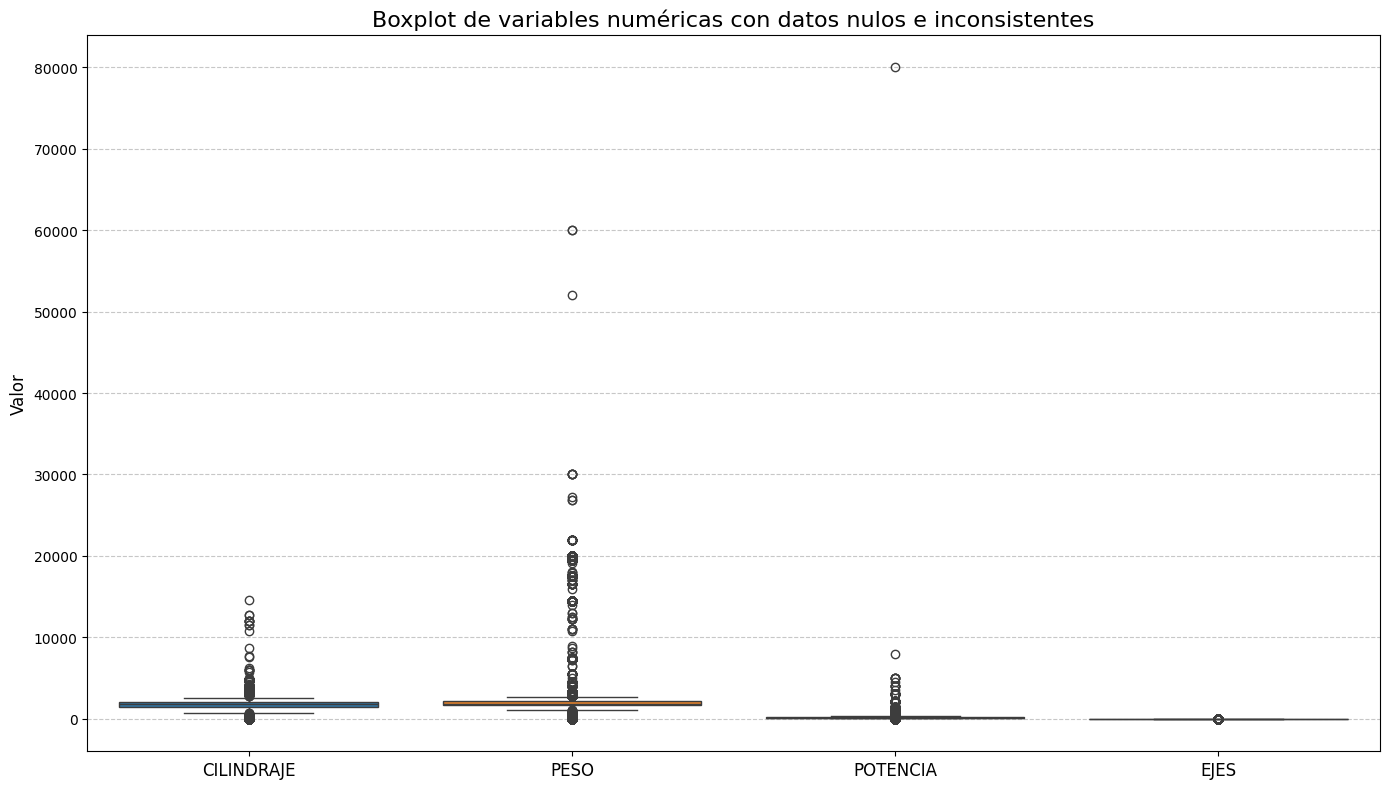

In [21]:
plt.figure(figsize=(14, 8))

ax = sns.boxplot(data=df_filtered[['CILINDRAJE', 'PESO', 'POTENCIA', 'EJES']])

plt.title('Boxplot de variables numéricas con datos nulos e inconsistentes', fontsize=16)
plt.ylabel('Valor', fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Podemos observar algunas inconsistencias en potencia, peso y cilindraje que se deben evaluar.

In [22]:
high_power_vehicles = df_filtered[df_filtered['POTENCIA'] > 3000]
print(high_power_vehicles)

     COMBUSTIBLE  MODELO          FECHA_REGISTRO  AÑO_REGISTRO        CLASE  \
456    ELECTRICO    2014  02/12/2014 12:00:00 AM          2014  MOTOCICLETA   
660    ELECTRICO    2020  07/28/2021 12:00:00 AM          2021  CUADRICICLO   
745    ELECTRICO    2020  09/29/2022 12:00:00 AM          2022  MOTOCICLETA   
771    ELECTRICO    2019  08/25/2020 12:00:00 AM          2020  MOTOCICLETA   
773    ELECTRICO    2021  01/21/2021 12:00:00 AM          2021    AUTOMOVIL   
1522   ELECTRICO    2020  09/03/2021 12:00:00 AM          2021  CUADRICICLO   
2654   ELECTRICO    2018  06/28/2018 12:00:00 AM          2018  MOTOCICLETA   
3712   ELECTRICO    2014  02/28/2014 12:00:00 AM          2014  MOTOCICLETA   
4941   ELECTRICO    2014  02/17/2014 12:00:00 AM          2014  MOTOCICLETA   
5163   ELECTRICO    2017  12/05/2018 12:00:00 AM          2018    MOTOCARRO   
6097   ELECTRICO    2014  12/30/2013 12:00:00 AM          2013  MOTOCICLETA   
6499   ELECTRICO    2019  03/04/2022 12:00:00 AM    

El anterior vehículo no tiene tal potencia. Al ver que es particular y su modalidad es de 'PASAJEROS', imputamos la mediana para conservar ese dato. El mayor vehículo híbrido-eléctrico hasta el momento con mayor caballos de fuerza (HP) tiene 1000 HP (https://es.wikipedia.org/wiki/Ferrari_SF90_Stradale), por lo que los datos mayores a este valor, imputaremos la mediana para conservar los datos teniendo en cuenta los outliers que pueden presentarse, a los vehículos que tengan potencia mayor a 1000 HP

In [23]:
# Calculate median of potencia excluding the outliers
median_potencia = df_filtered[df_filtered['POTENCIA'] <= 75000]['POTENCIA'].median()

df_filtered.loc[df_filtered['POTENCIA'] > 1000, 'POTENCIA'] = median_potencia

df_filtered['POTENCIA'].max()

np.float64(1000.0)

In [24]:
df_filtered['POTENCIA'].value_counts()

POTENCIA
126.0    13476
88.0      5075
153.0     4404
176.0     3152
200.0     2775
         ...  
330.0        1
112.0        1
285.0        1
650.0        1
829.0        1
Name: count, Length: 190, dtype: int64

En cuanto a peso:

In [25]:
high_weight_vehicles = df_filtered[df_filtered['PESO'] > 4000]
print(high_weight_vehicles)
print(len(high_weight_vehicles))
print(high_weight_vehicles['SERVICIO'].value_counts())

      COMBUSTIBLE  MODELO          FECHA_REGISTRO  AÑO_REGISTRO   CLASE  \
0       ELECTRICO    2022  06/30/2022 12:00:00 AM          2022     BUS   
14      ELECTRICO    2022  07/14/2022 12:00:00 AM          2022     BUS   
16      ELECTRICO    2022  03/14/2022 12:00:00 AM          2022     BUS   
31      ELECTRICO    2022  03/12/2022 12:00:00 AM          2022     BUS   
40      ELECTRICO    2022  07/05/2022 12:00:00 AM          2022     BUS   
...           ...     ...                     ...           ...     ...   
51239   DIES ELEC    2020  05/12/2020 12:00:00 AM          2020  CAMION   
52034   DIES ELEC    2020  03/19/2020 12:00:00 AM          2020  CAMION   
52035   DIES ELEC    2020  06/02/2020 12:00:00 AM          2020  CAMION   
52036   DIES ELEC    2020  12/30/2020 12:00:00 AM          2020  CAMION   
55028   DIES ELEC    2023  08/03/2022 12:00:00 AM          2022  CAMION   

      SERVICIO MARCA           LINEA CARROCERIA  CILINDRAJE  MODALIDAD  \
0      Público   BYD     

Si bien los vehículos dada su función pueden tener dicho peso, se quitarán estos datos para aumentar la precisión de un posible modelo. Solamente se mantendrán datos menores a 4.000 kg de peso, pues en su mayoría son para servicio particular, lo que podría aumentar la precision del modelo.

In [26]:
df_filtered = df_filtered[df_filtered['PESO'] < 4000]
df_filtered['PESO'].max()

np.float64(3960.0)

In [27]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51603 entries, 1 to 56544
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COMBUSTIBLE     51603 non-null  object 
 1   MODELO          51603 non-null  int64  
 2   FECHA_REGISTRO  51603 non-null  object 
 3   AÑO_REGISTRO    51603 non-null  int64  
 4   CLASE           51603 non-null  object 
 5   SERVICIO        51603 non-null  object 
 6   MARCA           51603 non-null  object 
 7   LINEA           51603 non-null  object 
 8   CARROCERIA      51603 non-null  object 
 9   CILINDRAJE      50830 non-null  float64
 10  MODALIDAD       51603 non-null  object 
 11  MUNICIPIO       51603 non-null  object 
 12  DEPARTAMENTO    51603 non-null  object 
 13  PESO            51603 non-null  float64
 14  POTENCIA        51456 non-null  float64
 15  EJES            51424 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 6.7+ MB


El cilindraje más fuerte en litros (L) es de 106 litros de desplazamiento (Caterpillar 797F) (https://www.eluniversal.com.mx/autopistas/los-5-motores-de-autos-mas-grandes-de-la-historia/?utm_source=chatgpt.com). Si bien es exagerado más de esto, vamos a conservar aquellos datos que sean menores a 4000 L para no tener efectos significativos en la investigación, pues a partir de este rango la mayoría de vehículos son publicos.

In [28]:
high_cylinder_vehicles = df_filtered[df_filtered['CILINDRAJE'] > 4000]
print(high_cylinder_vehicles)
print(len(high_cylinder_vehicles))
print(high_cylinder_vehicles['SERVICIO'].value_counts())

      COMBUSTIBLE  MODELO          FECHA_REGISTRO  AÑO_REGISTRO      CLASE  \
17064   GASO ELEC    2011  04/19/2011 12:00:00 AM          2011  CAMIONETA   
21196   GASO ELEC    2011  05/24/2012 12:00:00 AM          2012  CAMIONETA   
21197   GASO ELEC    2011  01/02/2012 12:00:00 AM          2012  CAMIONETA   
44737   GASO ELEC    2011  02/09/2011 12:00:00 AM          2011  CAMIONETA   
54288   GASO ELEC    2021  02/03/2022 12:00:00 AM          2022  CAMIONETA   

         SERVICIO      MARCA      LINEA    CARROCERIA  CILINDRAJE  MODALIDAD  \
17064  Particular  CHEVROLET  SILVERADO  DOBLE CABINA      5967.0      MIXTO   
21196  Particular  CHEVROLET  SILVERADO  DOBLE CABINA      5967.0      MIXTO   
21197  Particular  CHEVROLET  SILVERADO  DOBLE CABINA      5967.0  PASAJEROS   
44737  Particular  CHEVROLET  SILVERADO  DOBLE CABINA      5967.0      MIXTO   
54288  Particular        RAM       1500  DOBLE CABINA      5700.0      MIXTO   

          MUNICIPIO DEPARTAMENTO    PESO  POTENCIA

In [29]:
df_filtered = df_filtered[df_filtered['CILINDRAJE'] < 4000]
df_filtered['CILINDRAJE'].max()

np.float64(3996.0)

In [30]:
df_filtered.isnull().sum()

COMBUSTIBLE         0
MODELO              0
FECHA_REGISTRO      0
AÑO_REGISTRO        0
CLASE               0
SERVICIO            0
MARCA               0
LINEA               0
CARROCERIA          0
CILINDRAJE          0
MODALIDAD           0
MUNICIPIO           0
DEPARTAMENTO        0
PESO                0
POTENCIA          128
EJES               78
dtype: int64

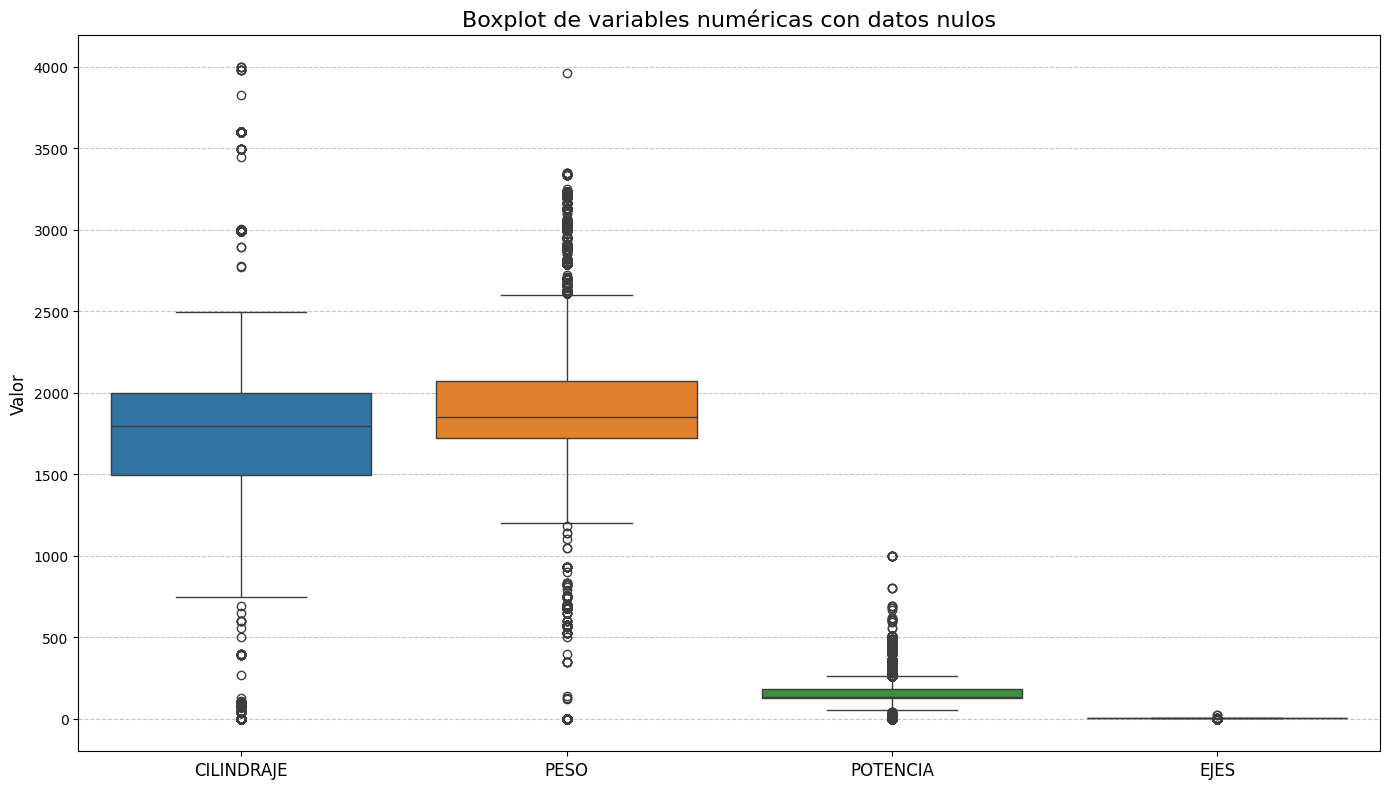

In [31]:
plt.figure(figsize=(14, 8))

ax = sns.boxplot(data=df_filtered[['CILINDRAJE', 'PESO', 'POTENCIA', 'EJES']])

plt.title('Boxplot de variables numéricas con datos nulos', fontsize=16)
plt.ylabel('Valor', fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Se eliminan los datos nulos debido al bajo nivel que hay de estos.

In [32]:
df_filtered = df_filtered.dropna()
df_filtered.isnull().sum()

COMBUSTIBLE       0
MODELO            0
FECHA_REGISTRO    0
AÑO_REGISTRO      0
CLASE             0
SERVICIO          0
MARCA             0
LINEA             0
CARROCERIA        0
CILINDRAJE        0
MODALIDAD         0
MUNICIPIO         0
DEPARTAMENTO      0
PESO              0
POTENCIA          0
EJES              0
dtype: int64

# **Analisis general**

In [33]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50672 entries, 1 to 56544
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COMBUSTIBLE     50672 non-null  object 
 1   MODELO          50672 non-null  int64  
 2   FECHA_REGISTRO  50672 non-null  object 
 3   AÑO_REGISTRO    50672 non-null  int64  
 4   CLASE           50672 non-null  object 
 5   SERVICIO        50672 non-null  object 
 6   MARCA           50672 non-null  object 
 7   LINEA           50672 non-null  object 
 8   CARROCERIA      50672 non-null  object 
 9   CILINDRAJE      50672 non-null  float64
 10  MODALIDAD       50672 non-null  object 
 11  MUNICIPIO       50672 non-null  object 
 12  DEPARTAMENTO    50672 non-null  object 
 13  PESO            50672 non-null  float64
 14  POTENCIA        50672 non-null  float64
 15  EJES            50672 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 6.6+ MB
